Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [41]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [43]:
cols_to_drop = ['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']

# Checks if the columns to drop can be found in the movies_df 
if any(col in movies_df.columns for col in cols_to_drop):
    movies_df.drop(columns=cols_to_drop,inplace=True)
movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


#### Remove any duplicate rows

In [44]:
movies_df = movies_df.drop_duplicates()

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [45]:
def null_data_check(dataframe):
    '''Used for checking data frame for nulls.'''
    # Checking for nulls
    # get the number of missing data points per column
    missing_values_count = dataframe.isnull().sum()

    # look at the # of missing points in the first ten columns
    print(missing_values_count[0:24])
    


In [46]:
null_data_check(movies_df)
movies_df = movies_df.dropna()
null_data_check(movies_df)

budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64
budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64


#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [47]:
# Change the release_date column to DateTime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df.head()
# Extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year


Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [48]:
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4800 non-null   int64         
 1   genres                4800 non-null   object        
 2   id                    4800 non-null   int64         
 3   popularity            4800 non-null   float64       
 4   production_countries  4800 non-null   object        
 5   release_date          4800 non-null   datetime64[ns]
 6   revenue               4800 non-null   int64         
 7   runtime               4800 non-null   float64       
 8   spoken_languages      4800 non-null   object        
 9   title                 4800 non-null   object        
 10  vote_average          4800 non-null   float64       
 11  vote_count            4800 non-null   int64         
 12  release_year          4800 non-null   int32         
dtypes: datetime64[ns](1), f

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [49]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [50]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
1687,0,"['Drama', 'History']",11499,16.87784,['United States of America'],2008-10-15,0,122.0,"['English', 'Español']",Frost/Nixon,7.2,328,2008


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [51]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].str.contains('Action')]
action_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [52]:
movies_df_top_5 = movies_df.sort_values(by='revenue', ascending=False)
movies_df_top_5.head(5)

movies_df_bottom_5 = movies_df.sort_values(by='revenue', ascending=True)
movies_df_bottom_5.head(5)

#combined data 
combined_data = pd.concat([movies_df_top_5.head(5),movies_df_bottom_5.head(5)])
combined_data.head(10)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1997
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,2012
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,2015
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015
4802,0,['Documentary'],25975,1.929883,['United States of America'],2005-08-05,0,90.0,['English'],My Date with Drew,6.3,16,2005
3289,0,"['Comedy', 'Drama', 'Romance']",12183,1.265683,"['Germany', 'United States of America']",2005-08-03,0,99.0,['English'],The Wendell Baker Story,5.2,16,2005
3291,8000000,"['Crime', 'Horror', 'Thriller']",12192,9.782433,['United States of America'],2008-04-11,0,95.0,['English'],Pathology,5.6,144,2008
3292,0,['Drama'],36597,4.409263,[],2009-01-18,0,142.0,['English'],Wuthering Heights,6.9,37,2009
3294,0,"['Comedy', 'Crime', 'Drama', 'Romance']",10913,2.597665,"['Denmark', 'France', 'United Kingdom']",2005-01-22,0,105.0,['English'],Dear Wendy,5.6,33,2005


Top 5 and Bottom 5 movies

#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [53]:
movies_df_profit = movies_df
movies_df_profit['profit'] = movies_df['revenue'] - movies_df['budget']

min_value = movies_df.min()
print(min_value)
max_value = movies_df.max()
print(max_value)


budget                                                                  0
genres                  ['Action', 'Adventure', 'Animation', 'Comedy',...
id                                                                      5
popularity                                                       0.000372
production_countries                  ['Afghanistan', 'Ireland', 'Japan']
release_date                                          1916-09-04 00:00:00
revenue                                                                 0
runtime                                                               0.0
spoken_languages                               ['', 'Deutsch', 'English']
title                                                             #Horror
vote_average                                                          0.0
vote_count                                                              0
release_year                                                         1916
profit                                

#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [54]:
# Code here
movies_df = movies_df.sort_values(by='popularity', ascending=False)
movies_df.head()


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015,1082730962
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015,228858340


#### Find Movies which are rated above 7

In [55]:
# Code here
movies_rated_above_7 = movies_df[movies_df['vote_average'] >=7]
movies_rated_above_7.head(10)


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015,228858340
199,140000000,"['Adventure', 'Fantasy', 'Action']",22,271.972889,['United States of America'],2003-07-09,655011224,143.0,['English'],Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,2003,515011224
82,170000000,"['Science Fiction', 'Action', 'Drama', 'Thrill...",119450,243.791743,['United States of America'],2014-06-26,710644566,130.0,['English'],Dawn of the Planet of the Apes,7.3,4410,2014,540644566
88,165000000,"['Adventure', 'Family', 'Animation', 'Action',...",177572,203.734590,['United States of America'],2014-10-24,652105443,102.0,['English'],Big Hero 6,7.8,6135,2014,487105443
26,250000000,"['Adventure', 'Action', 'Science Fiction']",271110,198.372395,['United States of America'],2016-04-27,1153304495,147.0,"['Română', 'English', 'Deutsch', 'Pусский']",Captain America: Civil War,7.1,7241,2016,903304495
3865,3300000,['Drama'],244786,192.528841,['United States of America'],2014-10-10,13092000,105.0,['English'],Whiplash,8.3,4254,2014,9792000
65,185000000,"['Drama', 'Action', 'Crime', 'Thriller']",155,187.322927,"['United Kingdom', 'United States of America']",2008-07-16,1004558444,152.0,"['English', '普通话']",The Dark Knight,8.2,12002,2008,819558444


#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

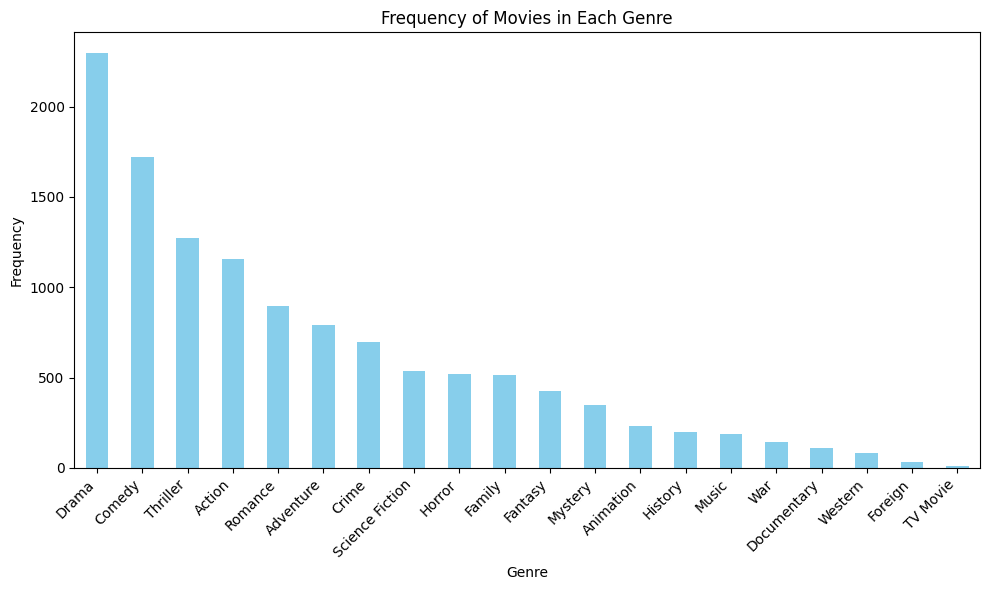

In [56]:
# Convert genres from string to list
movies_df['genres'] = movies_df['genres'].apply(ast.literal_eval)

# Flatten the list of genres
genres_list = [genre for sublist in movies_df['genres'] for genre in sublist]

# Count the frequency of each genre
genre_counts = pd.Series(genres_list).value_counts()

# Plotting
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The graph above displays the total number of movies per genre. This allows us to get a visual of the frequency of movies made per genre.

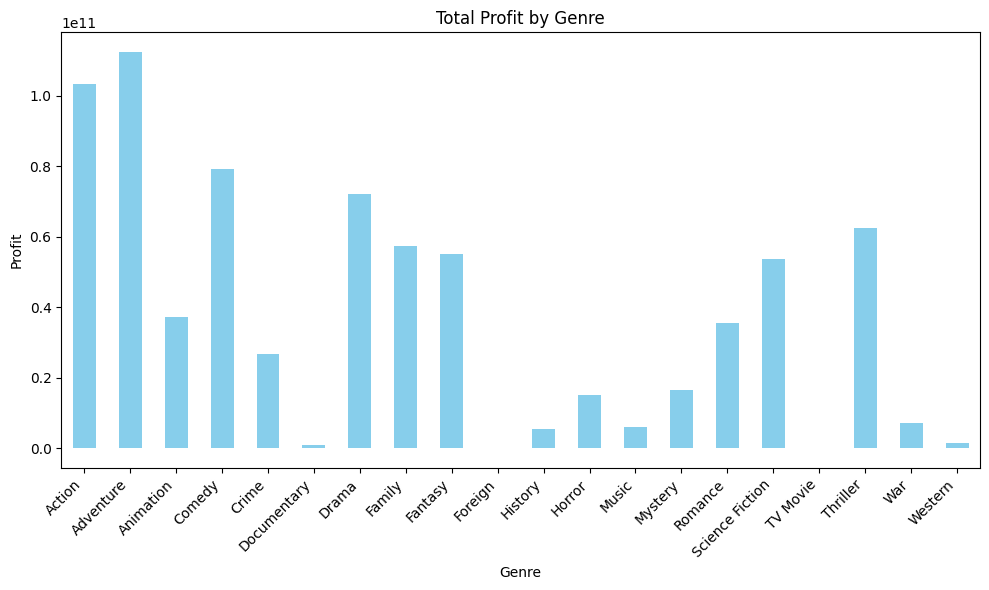

In [57]:
# Step 1: Calculate profit for each movie
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Step 2: Merge profit information with genres
genres_profit = movies_df.explode('genres')[['genres', 'profit']]

# Step 3: Group by genre and sum the profits
genre_profit_sum = genres_profit.groupby('genres')['profit'].sum()

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
genre_profit_sum.plot(kind='bar', color='skyblue')
plt.title('Total Profit by Genre')
plt.xlabel('Genre')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The graph above displays to us the profitability of each genre. While it can be note that the adventure genre is the most profitable if we look at the 'Frequency of Movies in Each Genre' graph you can see that the adeventure genre does not have as many movies made as the drama genre. We could then further deduce that while Drama movies are made more frequently they are not the most profitable and rather that adeventure movies are based on the profitablity of the genre.

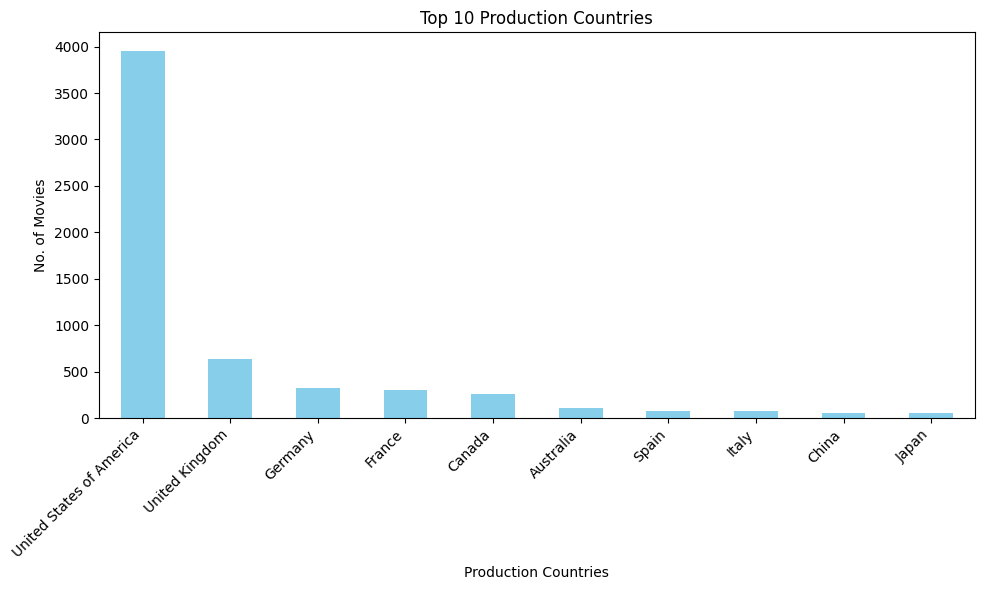

In [58]:
# Convert genres from string to list
movies_df['production_countries'] = movies_df['production_countries'].apply(ast.literal_eval)

# Flatten the list of production_countries
prod_countries_list = [prod_countries for sublist in movies_df['production_countries'] for prod_countries in sublist]

# Count the frequency of each production_countries
prod_countries_counts = pd.Series(prod_countries_list).value_counts().head(10)

#most popular production countries
# Plotting
plt.figure(figsize=(10, 6))
prod_countries_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Production Countries')
plt.xlabel('Production Countries')
plt.ylabel('No. of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The graph above displys to us the top 10 production countries. As we can see the United States of America far exceeds any of the other countries by thousands leading us to believe that they are the leaders in production.

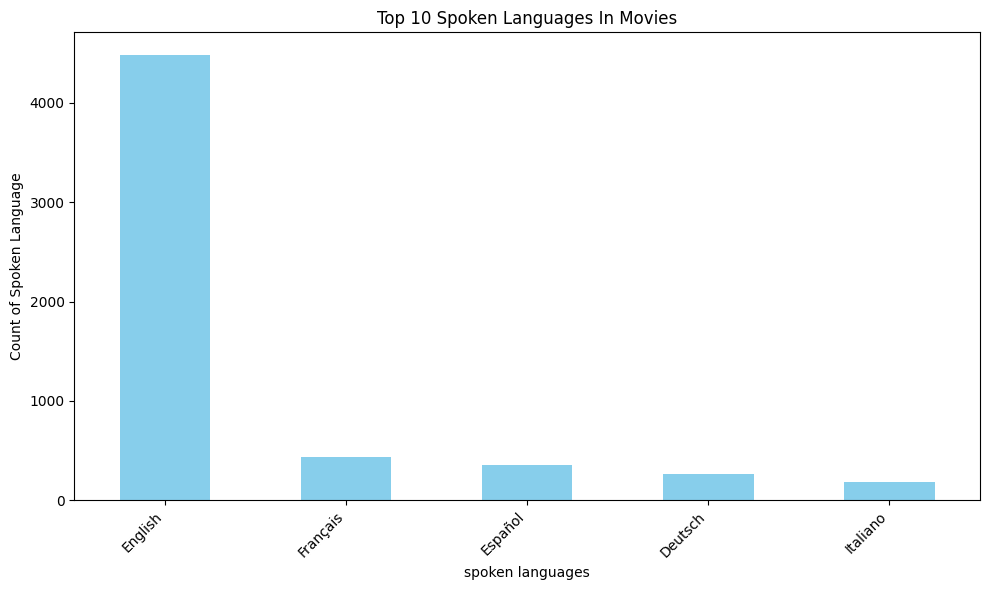

In [59]:
# Convert genres from string to list
movies_df['spoken_languages'] = movies_df['spoken_languages'].apply(ast.literal_eval)

# Flatten the list of production_countries
spoken_lang_list = [spoken_languages for sublist in movies_df['spoken_languages'] for spoken_languages in sublist]

# Count the frequency of each production_countries
spoken_languages_counts = pd.Series(spoken_lang_list).value_counts().head(5)

#most popular production countries
# Plotting
plt.figure(figsize=(10, 6))
spoken_languages_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Spoken Languages In Movies')
plt.xlabel('spoken languages')
plt.ylabel('Count of Spoken Language')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The Graph above display the top 5 most spoken languages for movies. English being the most popluar makes ties in with the results of the most popular production location as the United States of america where english is the home language.